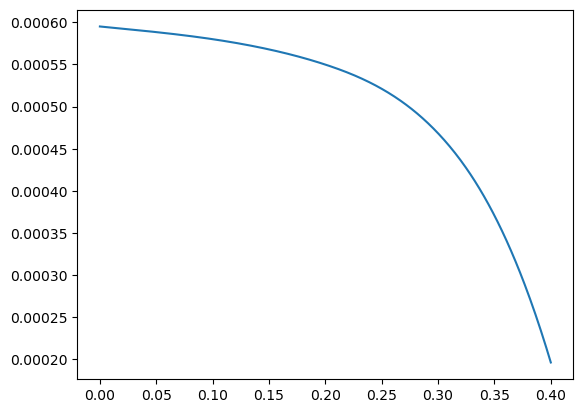

In [36]:
import numpy as np
import pandas as pd


'''xcircle = np.linspace(0,2,100)
ycircle = (4-xcircle**2)**0.5''' #test with a circcle of radius 2, maximum area should be 2.

# Generate data
x = np.array([ 0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25,  0.3 ,  0.35,  0.4])

y = np.array([-5.950590e-04, -5.883810e-04,
        -5.799950e-04, -5.678590e-04, -5.498340e-04, -5.210900e-04,
        -4.682940e-04, -3.707130e-04, -1.963570e-04])*-1


# Make dataframe
data = pd.DataFrame({'x':x, 'y':y})


# Make a spline curve

from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(data.x, data.y)
X_ = np.linspace(data.x.min(), data.x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

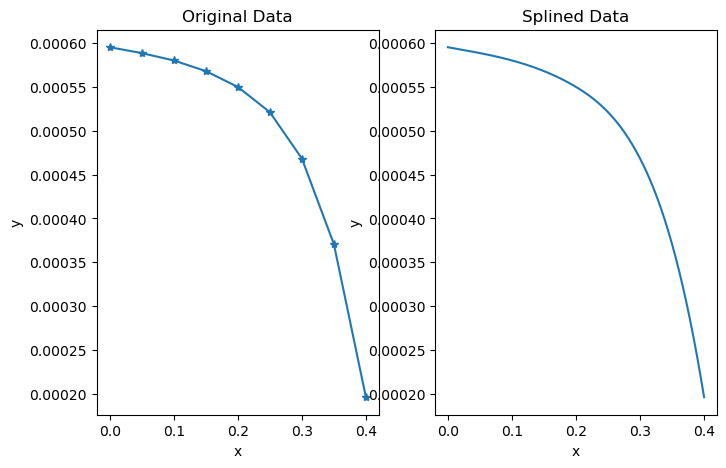

In [37]:
# Plot before and after splining 

# Filter by condition
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5), fig.set_figwidth(8) # Alter figure size
ax1.plot(data.x, data.y, marker='*')
ax1.set_title('Original Data')
ax1.set_xlabel("x"), ax1.set_ylabel('y')
ax2.plot(X_, Y_)
ax2.set_title('Splined Data')
ax2.set_xlabel("x"), ax2.set_ylabel('y')

In [40]:
# Find best x/y trade-off

splined_df = pd.DataFrame({'X_':X_, 'Y_':Y_})
splined_df['area'] = splined_df.X_*splined_df.Y_

bestx = splined_df['X_'][splined_df['area'] == splined_df.area.max()].values[0]
besty = splined_df['Y_'][splined_df['area'] == splined_df.area.max()].values[0]


print('x =',bestx,'y =', besty)
print('The maximum is around:', bestx*besty)

x = 0.3054108216432866 y = 0.0004603851784237901
The maximum is around: 0.00014060661561480085


Text(0, 0, 'Area:\n0.00014060661561480085')

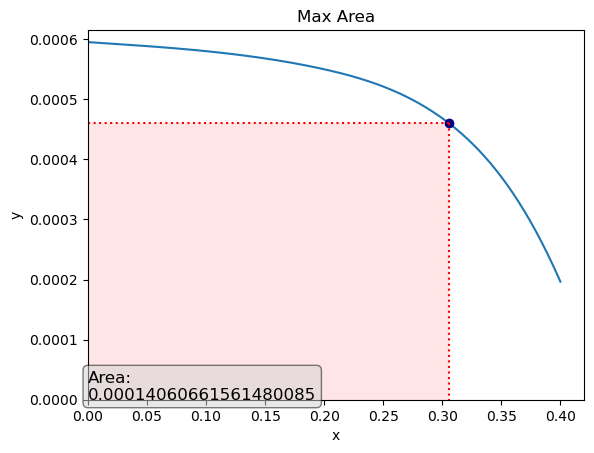

In [43]:
# Plot the maximum
import matplotlib.patches as mpatches
plt.plot(X_, Y_)
plt.title('Max Area')
plt.xlabel('x'), plt.ylabel('y')
plt.xlim(0), plt.ylim(0) # Prevent negative axes numbers 
left, bottom, width, height = (0, 0, bestx, besty)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=True, # Coloured/No fill
                        facecolor="red", # Fill colour
                        #color="purple", # Line colour
                       linewidth=2, # Thickness of line 
                       alpha=0.1, #transparency
                       # hatch='o' # Alter pattern on rectangle 
                       )
plt.gca().add_patch(rect) # Add rectangle to figure
#Add point
plt.plot(bestx, besty, marker = 'o', color='navy')
#Add vertical and horizontal lines
plt.vlines(bestx, besty, 0, color='red', linestyles='dotted')
plt.hlines(besty, bestx, 0, color='red', linestyles='dotted')
#Add text
plt.text(0, 0, 'Area:\n{}'.format(round(splined_df.area.max(), 200)), 
# Add box and alter font size
         bbox = dict(facecolor = 'lightgrey', alpha = 0.5, edgecolor='black',
                     boxstyle='round'), fontsize=12)